### OpenCVを使った画像処理

今回は画像認識するために、画像処理について説明します。

先ずは、以下のコードを実行して、OpenCVを導入します。

In [ ]:
import cv2

print(cv2.__version__)

4.1.2


#### 画像を扱う

ここでは画像ファイルを読み込む方法，表示する方法，保存する方法を紹介します。

In [ ]:
# Google ドライブをマウントする
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


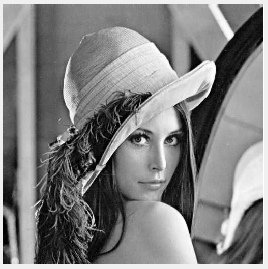

[[[240 240 240]
  [240 240 240]
  [240 240 240]
  ...
  [240 240 240]
  [240 240 240]
  [240 240 240]]

 [[240 240 240]
  [240 240 240]
  [240 240 240]
  ...
  [240 240 240]
  [240 240 240]
  [240 240 240]]

 [[240 240 240]
  [240 240 240]
  [240 240 240]
  ...
  [240 240 240]
  [240 240 240]
  [240 240 240]]

 ...

 [[240 240 240]
  [240 240 240]
  [240 240 240]
  ...
  [240 240 240]
  [240 240 240]
  [240 240 240]]

 [[240 240 240]
  [240 240 240]
  [240 240 240]
  ...
  [240 240 240]
  [240 240 240]
  [240 240 240]]

 [[240 240 240]
  [240 240 240]
  [240 240 240]
  ...
  [240 240 240]
  [240 240 240]
  [240 240 240]]]


In [ ]:
from google.colab.patches import cv2_imshow

# 画像ファイルを読み込むには cv2.imread() という関数を使う
filepath = "/content/drive/My Drive/OpenCV_test.png"
img = cv2.imread(filepath)

# 画像をウィンドウ上に表示するには cv2.imshow() という関数を使う
# 元はcv2.imshow(img)を使いますが、colabで無効化になるために、以下の例を参考してください 
cv2_imshow(img)

# img　実はBGRで構成された数列です。
print(img)

In [ ]:
# 画像を保存するには cv2.imwrite() 関数を使う
cv2.imwrite("/content/drive/My Drive/OpenCV_new.png", img)

True

#### OpenCVの描画機能

OpenCVは色々な幾何学的形状を持つオブジェクトを描画することができます。

以下の関数の使い方を紹介します: cv2.rectangle(), cv2.circle(), cv2.putText().
上記全ての関数に共通する引数を以下に示します:
+ img : オブジェクトを描画する画像
+ color : オブジェクトの色．BGRで指定する場合はtupleとして指定する，例えば青であれば (255,0,0)
+ thickness : 線や円などの太さ
+ lineType : 線のタイプ， 8連結，アンチーエイリアス等

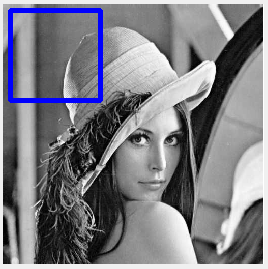

In [ ]:
# 長方形の描画
# 長方形を描画するには長方形の左上と右下の角の座標を指定する
img_copy1 = img.copy()
new_img1 = cv2.rectangle(img_copy1, (10, 10), (100, 100), (255,0,0), 3)
cv2_imshow(new_img1)

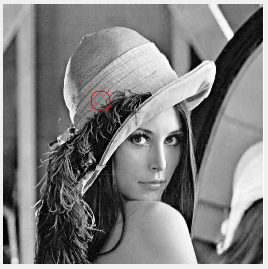

In [ ]:
# 円の描画
# 円を描画するには中心の座標と半径を指定する
img_copy2 = img.copy()
new_img2 = cv2.circle(img_copy2, (100, 100), 10, (0,0,255), 1)
cv2_imshow(new_img2)

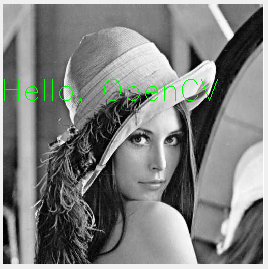

In [ ]:
# 画像にテキストを追加
img_copy3 = img.copy()
new_img3 = cv2.putText(img_copy3, "Hello, OpenCV", (0, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0))
cv2_imshow(new_img3)

#### 画像をカットする

関数ではなく、座標を使用して画像をカットすることができます。

In [ ]:
# 例えば、この画像の中央部分をカットする
# 画像のサイズを出力する
print(img.shape)
# 結果は(269, 268, 3)
# この順番は高さ、長さ、チャンネル数である

(269, 268, 3)


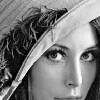

In [ ]:
# 中心は大体(134,134)である
# 高さと長さを100に指定する
crop_img = img[134-50:134+50, 134-50:134+50]
cv2_imshow(crop_img)

### 課題

Google ドライブにある人類の画像をアープロードして、顔の部分に円を描画し、カットして保存してください。

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


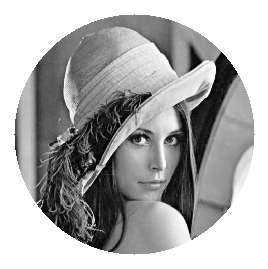

In [5]:
# 解答欄
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

from google.colab import drive
drive.mount("/content/drive")

filepath = "/content/drive/My Drive/OpenCV_test.png"
# 268*269
img = cv2.imread(filepath, cv2.IMREAD_UNCHANGED)
rows, cols, channel = img.shape

# create a new 4 channel image as zero
img_new = np.zeros((rows, cols, 4), np.uint8)
img_new[:,:,0:3] = img[:,:,0:3]

# create a new 1 channel image
img_circle = np.zeros((rows, cols, 1), np.uint8)
img_circle[:,:,:] = 0
img_circle = cv2.circle(img_circle, (134, 134), 120, (255), -1)

img_new[:,:,3] = img_circle[:,:,0]

cv2.imwrite("/content/drive/My Drive/OpenCV_circle.png", img_new)
cv2_imshow(img_new)